In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
############################
# generate data
############################
data_x = np.random.uniform(low=-10,high=10,size=[100,1])
data_y = (data_x**3) + 4*(data_x**2) - 3*data_x + 10 + np.random.normal(scale=100,size=[len(data_x),1])
X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.9)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.9)

degree :  1
train cost :  161.08
validation cost :  128.139
test cost :  196.208
degree :  2
train cost :  155.638
validation cost :  135.093
test cost :  205.943
degree :  3
train cost :  59.3797
validation cost :  81.9329
test cost :  96.7909
degree :  4
train cost :  59.2618
validation cost :  101.08
test cost :  117.817


best_dgree :  3
best_validation_cost :  81.9329
best_test_cost :  96.7909


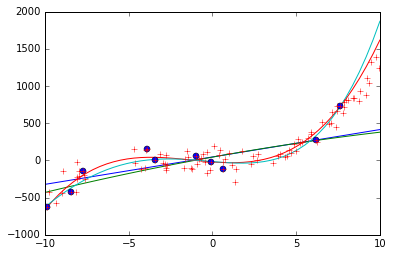

In [4]:
ds = [ 1,2,3,4 ]
best_dgree = 0
best_validation_cost = np.inf
best_test_cost = 0

for d in ds:        
    encoding_feature = PolynomialFeatures(degree=d)
    encoding_feature.fit(X_train)
    encoded_x = encoding_feature.transform(X_train)[:,1:]
    encoded_validation_x = encoding_feature.transform(X_val)[:,1:]
    encoded_test_x = encoding_feature.transform(X_test)[:,1:]
    _x = np.linspace(-10,10)
    
    tf.reset_default_graph()
    x = tf.placeholder(shape=[None,d],dtype=tf.float32,name='x')
    y = tf.placeholder(shape=[None,1],dtype=tf.float32,name='y')
    w = tf.Variable(np.random.normal(size=[d,1]),dtype=tf.float32,name='w')
    b = tf.Variable(np.zeros([1,1]),dtype=tf.float32,name='b')
    cost = tf.reduce_mean(tf.abs(y - (tf.matmul(x,w) + b)))
    grad = tf.train.AdamOptimizer(0.05).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(1000):
            sess.run([cost,grad],feed_dict={x: encoded_x, y: y_train})
        weight = sess.run(w)
        bias = sess.run(b)
        train_cost = sess.run(cost,feed_dict={x: encoded_x, y: y_train})
        validation_cost = sess.run(cost,feed_dict={x: encoded_validation_x, y: y_val})
        test_cost = sess.run(cost,feed_dict={x: encoded_test_x, y: y_test})
        print 'degree : ', d
        print 'train cost : ' , train_cost
        print 'validation cost : ' , validation_cost
        print 'test cost : ' , test_cost
        if best_validation_cost > validation_cost:
            best_dgree = d
            best_validation_cost = validation_cost
            best_test_cost = test_cost
        _y = np.matmul(encoding_feature.transform(_x.reshape(-1,1))[:,1:],weight) + bias
        plt.plot(_x,_y)
        
print '\n\nbest_dgree : ',best_dgree
print 'best_validation_cost : ',best_validation_cost
print 'best_test_cost : ',best_test_cost

plt.plot(X_train,y_train,'bo')    
plt.plot(data_x,data_y,'r+')
